# Notebook for Displaying $\gamma p \rightarrow K^+ \Lambda(1520)$  plots

In [1]:
# Standard imports and setup...

# Numpy handles numerical manipulations efficiently...
import numpy as np

# Matplotlib is the standard python plotting library...
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn is a layer on top of Matplotlib...
#import seaborn as sns

# Pandas is the python framework for handling datasets...
import pandas as pd

#import corner from home directory to be able to scale hist_bins (not in public release)
import sys
sys.path.insert(1,'/home/pauli/Documents/thesis/macros/corner.py/corner/')
import corner

## Read in Data
Let's get the data imported, and take a quick look at the stats...

In [2]:
# Definition of columns as given by Louise...
measured_obs_labels = [r'$\rho^0_{11}$',r'Re$\rho^0_{31}$',r'Re$\rho^0_{3-1}$',r'$\rho^1_{11}$',r'$\rho^1_{33}$',r'Re$\rho^1_{31}$',r'Re$\rho^1_{3-1}$',r'Im$\rho^2_{31}$',r'Im$\rho^2_{3-1}$','yield']
# Read file into a DataFrame...
#mcmc_df = pd.read_csv('/w/work5/home/pauli/Lambda1520/data/spring17_ver20/cached_sdme_GJ_upper_Kp_mcmc50k_nomultcombo/momentumTransferMinustmin0.15_/MCMCTree.csv', names=measured_obs_labels)
#mcmc_df = pd.read_csv('/w/work5/home/pauli/Lambda1520/data/spring17_ver20/cached_sdme_GJ_upper_Kp_mcmc50k_nomultcombo/momentumTransferMinustmin0.40_/MCMCTree.csv', names=measured_obs_labels)
#mcmc_df = pd.read_csv('/w/work5/home/pauli/Lambda1520/data/spring17_ver20/cached_sdme_GJ_upper_Kp_mcmc50k_nomultcombo/momentumTransferMinustmin0.60_/MCMCTree.csv', names=measured_obs_labels)
#mcmc_df = pd.read_csv('/w/work5/home/pauli/Lambda1520/data/spring17_ver20/cached_sdme_GJ_upper_Kp_mcmc50k_nomultcombo/momentumTransferMinustmin0.80_/MCMCTree.csv', names=measured_obs_labels)
#mcmc_df = pd.read_csv('/w/work5/home/pauli/Lambda1520/data/spring17_ver20/cached_sdme_GJ_upper_Kp_mcmc50k_nomultcombo/momentumTransferMinustmin1.00_/MCMCTree.csv', names=measured_obs_labels)
#mcmc_df = pd.read_csv('/w/work5/home/pauli/Lambda1520/data/spring17_ver20/cached_sdme_GJ_upper_Kp_mcmc50k_nomultcombo/momentumTransferMinustmin1.20_/MCMCTree.csv', names=measured_obs_labels)
#mcmc_df = pd.read_csv('/w/work5/home/pauli/Lambda1520/data/spring17_ver20/cached_sdme_GJ_upper_Kp_mcmc50k_nomultcombo/momentumTransferMinustmin1.45_/MCMCTree.csv', names=measured_obs_labels)
mcmc_df = pd.read_csv('/w/work5/home/pauli/Lambda1520/data/spring17_ver20/cached_sdme_GJ_upper_Kp_mcmc50k_nomultcombo/momentumTransferMinustmin1.80_/MCMCTree.csv', names=measured_obs_labels)
# Print first few rows as a check...
mcmc_df.head()

,$\rho^0_{11}$,Re$\rho^0_{31}$,Re$\rho^0_{3-1}$,$\rho^1_{11}$,$\rho^1_{33}$,Re$\rho^1_{31}$,Re$\rho^1_{3-1}$,Im$\rho^2_{31}$,Im$\rho^2_{3-1}$,yield
0,0.278875,0.021499,0.217034,0.352792,0.015259,0.056852,-0.022374,0.160123,-0.253545,976.015
1,0.278875,0.021499,0.217034,0.436754,0.015259,0.056852,-0.022374,0.160123,-0.253545,976.015
2,0.278875,0.021499,0.217034,0.242602,0.015259,0.056852,-0.022374,0.160123,-0.253545,976.015
3,0.278875,0.021499,0.217034,0.242602,0.015259,0.056852,-0.022374,0.160123,-0.253545,999.094
4,0.278875,0.021499,0.217034,0.242602,0.015259,0.056852,0.254306,0.160123,-0.253545,999.094


In [3]:
# Quick and dirty summary of stats...
print(mcmc_df.describe())

       $\rho^0_{11}$  Re$\rho^0_{31}$  Re$\rho^0_{3-1}$  $\rho^1_{11}$  \
count   49901.000000     49901.000000      49901.000000   49901.000000   
mean        0.243345         0.010110          0.248756       0.188870   
std         0.029705         0.024413          0.021191       0.126342   
min         0.122387        -0.074877          0.179327      -0.227539   
25%         0.222721        -0.006344          0.233590       0.106772   
50%         0.241789         0.009725          0.250175       0.188413   
75%         0.263502         0.027298          0.262830       0.274811   
max         0.345162         0.089715          0.318583       0.693761   

       $\rho^1_{33}$  Re$\rho^1_{31}$  Re$\rho^1_{3-1}$  Im$\rho^2_{31}$  \
count   49901.000000     49901.000000      49901.000000     49901.000000   
mean        0.262237        -0.044323          0.264540         0.156068   
std         0.109796         0.091019          0.085492         0.123943   
min        -0.174064        -


## Distributions

### Time Series
First plot MCMC chains, assuming that the tree orders rows by time step...

<Figure size 432x288 with 0 Axes>

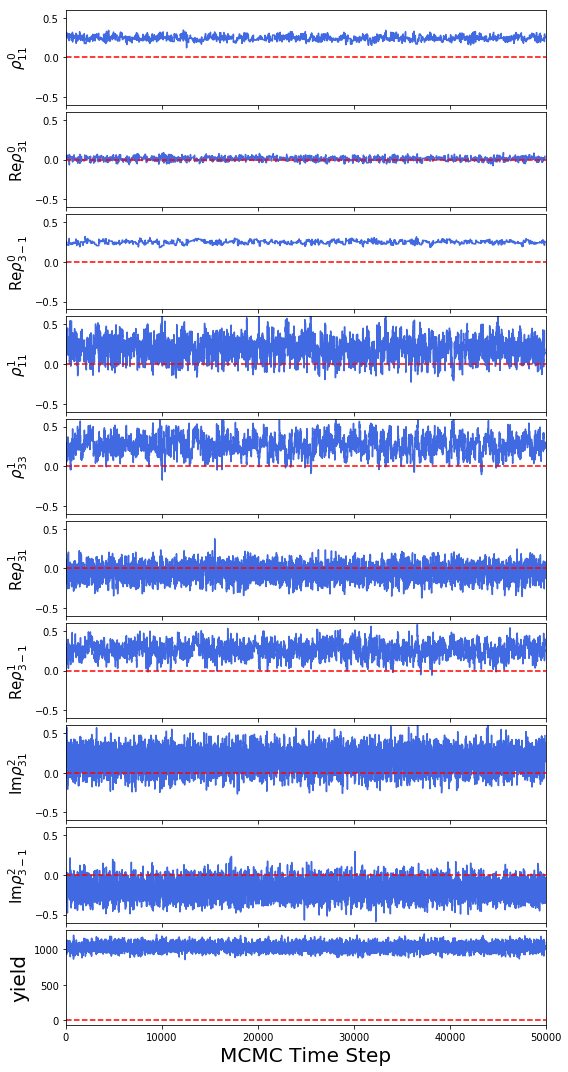

In [4]:
# clear current figure...
plt.clf()

n_obs = len(measured_obs_labels)

# set up figure with appropriate mcmc timelines...
# Play around with figsize arguments as desired
fig, axes = plt.subplots(n_obs, 1, sharex=True, figsize=(8, 15))

for i in range(n_obs-1):
    axes[i].plot(mcmc_df[measured_obs_labels[i]], color="royalblue")
    axes[i].set_ylabel(measured_obs_labels[i], fontsize=15)
    axes[i].set_ylim(-0.6,0.6)
    axes[i].set_xlim(0,50000)
    axes[i].axhline(0.0, color="red", linestyle='--')

axes[n_obs-1].plot(mcmc_df[measured_obs_labels[n_obs-1]], color="royalblue")
axes[n_obs-1].set_ylabel(measured_obs_labels[n_obs-1], fontsize=20)
#axes[n_obs-1].set_ylim(5400,7600)
axes[n_obs-1].axhline(0.0, color="red", linestyle='--')


axes[n_obs-1].set_xlabel("MCMC Time Step", fontsize=20)

fig.tight_layout(h_pad=0.0)

# To save plot as a figure, uncomment...
# plt.savefig('name_of_plot.pdf', bbox_inches = 'tight')

# Draw plot in notebook...
plt.show()

### Corner Plot

In [5]:
mcmc_df.mean()

$\rho^0_{11}$          0.243345
Re$\rho^0_{31}$        0.010110
Re$\rho^0_{3-1}$       0.248756
$\rho^1_{11}$          0.188870
$\rho^1_{33}$          0.262237
Re$\rho^1_{31}$       -0.044323
Re$\rho^1_{3-1}$       0.264540
Im$\rho^2_{31}$        0.156068
Im$\rho^2_{3-1}$      -0.178809
yield               1029.357815
dtype: float64

In [6]:
mcmc_df.median()

$\rho^0_{11}$          0.241789
Re$\rho^0_{31}$        0.009725
Re$\rho^0_{3-1}$       0.250175
$\rho^1_{11}$          0.188413
$\rho^1_{33}$          0.263441
Re$\rho^1_{31}$       -0.041499
Re$\rho^1_{3-1}$       0.266171
Im$\rho^2_{31}$        0.157373
Im$\rho^2_{3-1}$      -0.180795
yield               1027.860000
dtype: float64

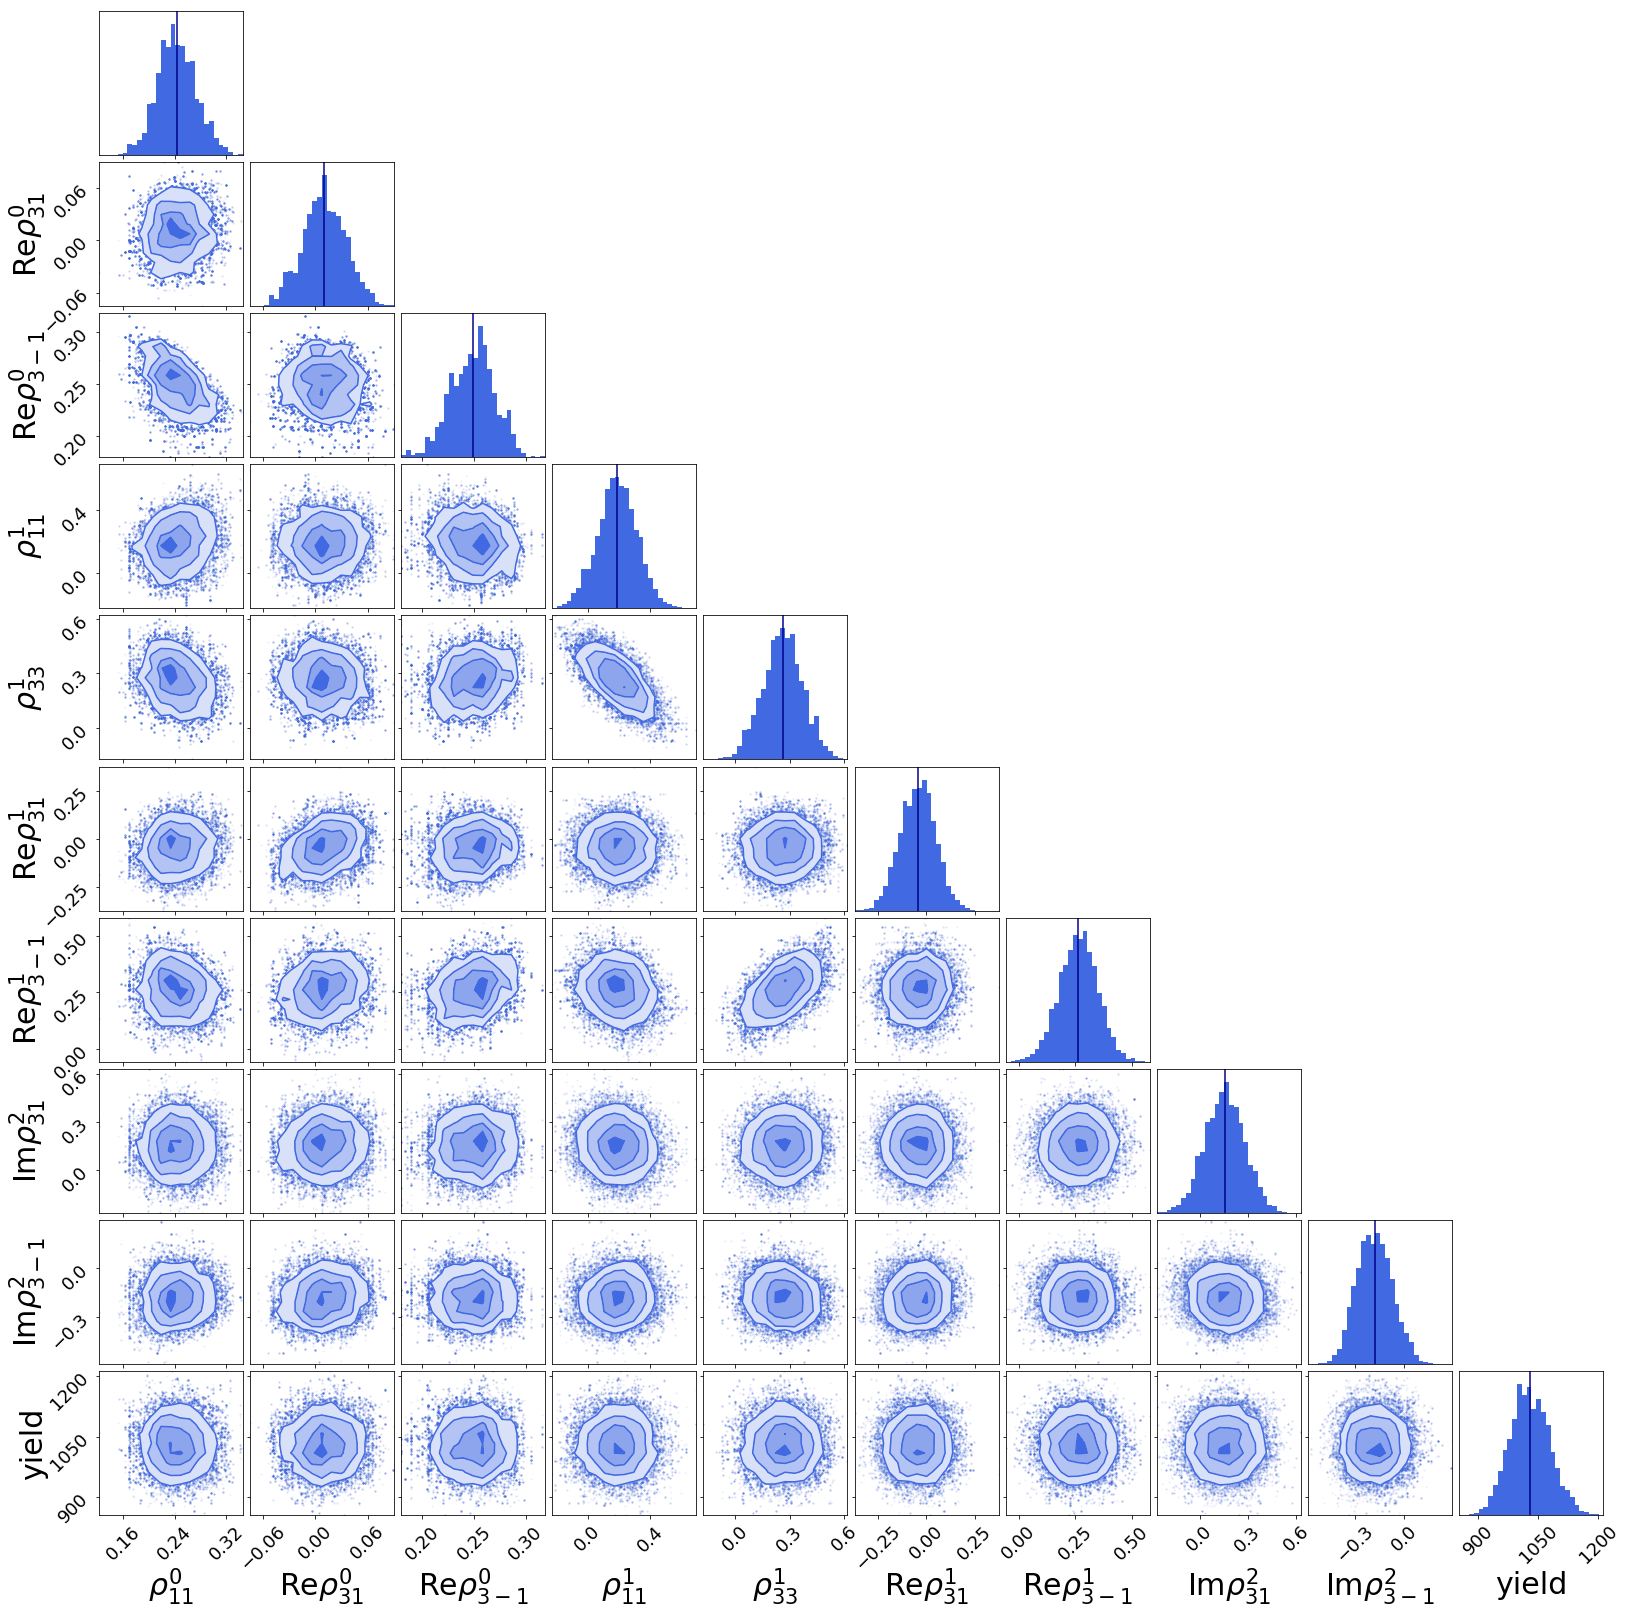

In [7]:
# Nice package to display multi-dimensional PDFs.
# https://corner.readthedocs.io/en/latest/index.html for API
fig = corner.corner(mcmc_df,
                    color='royalblue',
                    bins=15,
                    hist_bin_factor=2,
                    fill_contours=True,
                    truths=mcmc_df.mean().values,
                    truth_color='darkblue',
                    max_n_ticks=3,
                    label_kwargs={'fontsize':30},
                    hist_kwargs = {'histtype':'stepfilled','alpha':1})

plt.show()

## Autocorrelation

<Figure size 432x288 with 0 Axes>

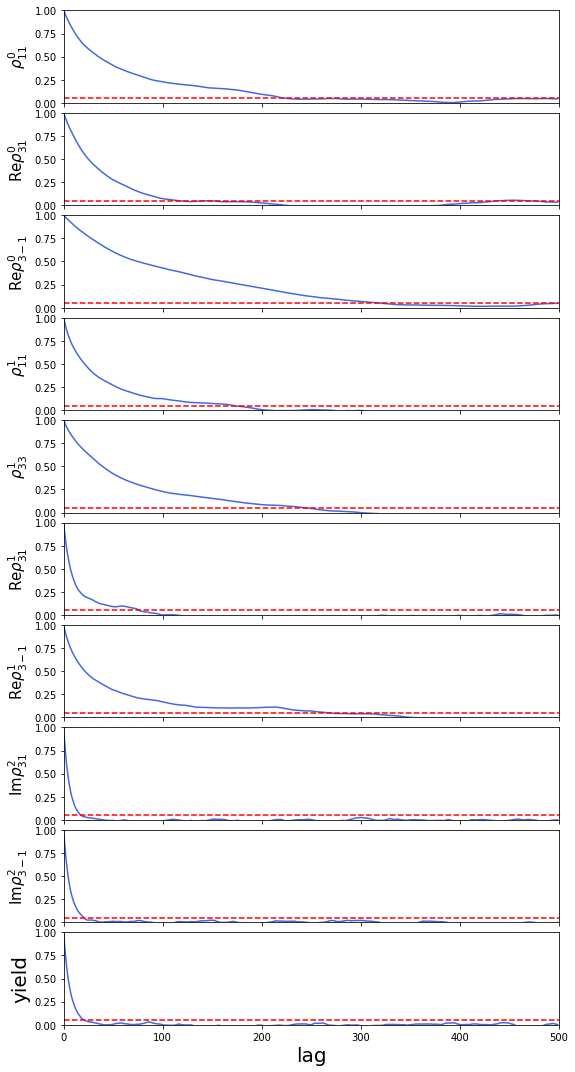

In [8]:
# clear current figure...
plt.clf()

n_obs = len(measured_obs_labels)
maxlag = 500
xaxis = np.arange(0,maxlag)
corr = np.arange(0,maxlag,dtype=float)

# set up figure with appropriate mcmc timelines...
# Play around with figsize arguments as desired
fig, axes = plt.subplots(n_obs, 1, sharex=True, figsize=(8, 15))

for i in range(n_obs-1):
    series = mcmc_df.iloc[:,i]
    for lag in xaxis:
        corr[lag] = series.autocorr(lag)
    axes[i].plot(xaxis,corr, color="royalblue")
    axes[i].set_ylabel(measured_obs_labels[i], fontsize=15)
    axes[i].set_ylim(0,1)
    axes[i].set_xlim(0,maxlag)
    axes[i].axhline(0.05, color="red", linestyle='--')

series = mcmc_df.iloc[:,n_obs-1]
for lag in xaxis:
    corr[lag] = series.autocorr(lag)
axes[n_obs-1].plot(xaxis,corr, color="royalblue")
axes[n_obs-1].set_ylabel(measured_obs_labels[n_obs-1], fontsize=20)
axes[n_obs-1].set_ylim(0,1)
axes[n_obs-1].axhline(0.05, color="red", linestyle='--')
axes[n_obs-1].set_xlabel("lag", fontsize=20)
fig.tight_layout(h_pad=0.0)

# To save plot as a figure, uncomment...
# plt.savefig('name_of_plot.pdf', bbox_inches = 'tight')

# Draw plot in notebook...
plt.show()


## Integrated auto-correlation time

In [9]:
import emcee

In [10]:
#help(emcee.autocorr)
for i in range(n_obs-1):
    series = mcmc_df.iloc[:,i]
    tau = emcee.autocorr.integrated_time(series,10,None,1,10,True)
    print(tau)

/usr/local/lib/python3.7/site-packages/emcee/autocorr.py:41: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  acf = np.fft.ifft(f * np.conjugate(f), axis=axis)[m].real


(119.08952939661035, 1193)
(86.65275796084693, 867)
(152.14651509213812, 1522)
(62.67345992896261, 627)
(92.6937254060224, 927)
(25.4681907774783, 255)
(82.52707875189378, 826)
(10.34782441981765, 104)
(14.641142547987878, 147)


## Seaborn Possibilities

### "Violin" Plot

NameError: name 'sns' is not defined

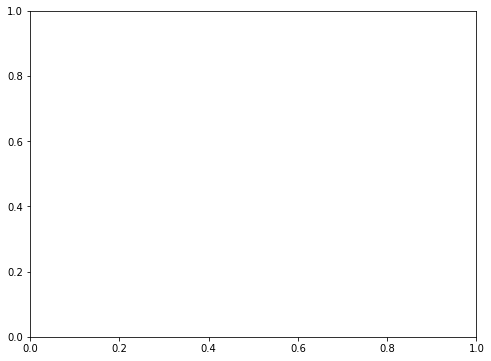

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use cubehelix to get a custom sequential palette
pal = sns.color_palette("hls", n_obs)

# Show each distribution with both violins and points
sns.violinplot(data=mcmc_df, palette=pal, inner="points")

ax.set_ylim(-0.3,0.6)
ax.axhline(0.0,color='red',linestyle='--')

plt.show()

### Box Plot

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use cubehelix to get a custom sequential palette
pal = sns.color_palette("hls", n_obs)

# Show each distribution with both violins and points
sns.boxplot(data=mcmc_df, palette=pal)

ax.set_ylim(-0.3,0.6)
ax.axhline(0.0,color='red',linestyle='--')

plt.show()

### Boxenplot

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Use cubehelix to get a custom sequential palette
pal = sns.color_palette("hls", n_obs)

# Show each distribution with both violins and points
sns.boxenplot(data=mcmc_df, palette=pal)

ax.set_ylim(-0.6,0.6)
ax.axhline(0.0,color='red',linestyle='--')

plt.show()

Enjoy...